수치를 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 모델부터 깊은 다층퍼셉트론 모델까지 구성 및 학습을 시켜보겠습니다

---
### 데이터셋 준비

4개의 인자를 이용해서 아래와 같이 

1 2 3 4 > 20

1 + (1+2) + (1+2+3) + (1+2+3+4) = 
1 + 3 + 6 + 10 = 20

    y = 1 * x1 + 2 * (x1 + x2) + 3 * (x3 + 4 * x4
    

 
num_pt = np.random.randint(100, width * height)

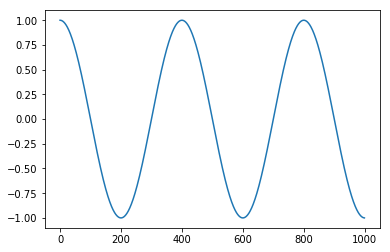

In [21]:
import numpy as np

cos_data = np.cos(np.arange(1000)*(10*np.pi/2000))[:,None]

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

In [ ]:
def calc_function(x):

    y = 0
    
    for i in range(10):
        for j in range(i):
            y += x[:,(j+1)]
            print((j+1))
            
    return y

In [ ]:
calc_function(10)

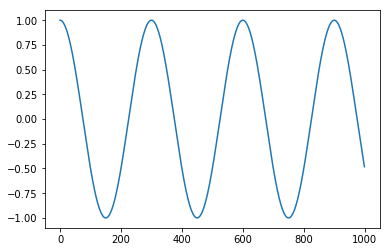

Epoch 1/50
700/700 [==============================] - 0s - loss: 0.3397     
Epoch 2/50
700/700 [==============================] - 0s - loss: 0.0594     
Epoch 3/50
700/700 [==============================] - 0s - loss: 0.0059     
Epoch 4/50
700/700 [==============================] - 0s - loss: 0.0037     
Epoch 5/50
700/700 [==============================] - 0s - loss: 0.0021     
Epoch 6/50
700/700 [==============================] - 0s - loss: 0.0015     
Epoch 7/50
700/700 [==============================] - 0s - loss: 0.0012     
Epoch 8/50
700/700 [==============================] - 0s - loss: 0.0011     
Epoch 9/50
700/700 [==============================] - 0s - loss: 9.9110e-04 
Epoch 10/50
700/700 [==============================] - 0s - loss: 9.2006e-04     
Epoch 11/50
700/700 [==============================] - 0s - loss: 8.3397e-04 
Epoch 12/50
700/700 [==============================] - 0s - loss: 7.7429e-04     
Epoch 13/50
700/700 [==============================] - 0s - loss:

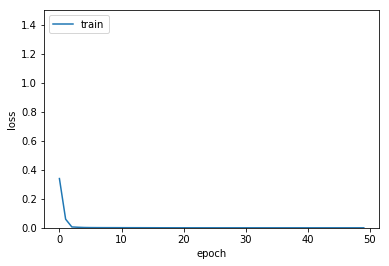

 32/296 [==>...........................] - ETA: 0sloss : 5.41728563941e-07


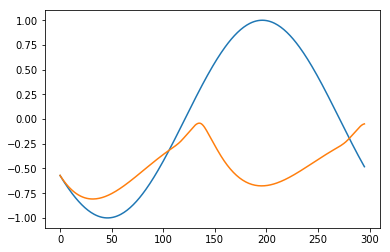

In [64]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

def create_dataset(raw, window=4):
    x_dataset, y_dataset = [], []
    for i in range(len(raw)-window):
        x_dataset.append(raw[i:(i+window), 0])
        y_dataset.append(raw[i + window, 0])
    return np.array(x_dataset), np.array(y_dataset)

# 1. 데이터셋 생성하기
cos_data = np.cos(np.arange(1000)*(10*np.pi/1500))[:,None]
x_dataset, y_dataset = create_dataset(cos_data)

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

x_train = x_dataset[:700]
y_train = y_dataset[:700]
x_test = x_dataset[700:]
y_test = y_dataset[700:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 확인하기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 7. 모델 사용하기
yhat_test = np.zeros(y_test.shape[0])
xhat_test = x_test[0]
    
for i in range(y_test.shape[0]):
    yhat = model.predict(np.array([xhat_test]), batch_size=1)
    yhat_test[i] = yhat
    xhat_test = np.hstack([xhat_test[1:], yhat[0]])

plt.plot(y_test)
plt.plot(yhat_test)
plt.show()

In [39]:
x_test[0]

array([  1.34773046e-15,   1.57073173e-02,   3.14107591e-02,
         4.71064507e-02])

In [38]:
xhat_test = np.vstack(x_test[0])
xhat_test

array([[  1.34773046e-15],
       [  1.57073173e-02],
       [  3.14107591e-02],
       [  4.71064507e-02]])

In [40]:
xhat_test = x_test[0]

In [44]:
xhat_test

array([  1.34773046e-15,   1.57073173e-02,   3.14107591e-02,
         4.71064507e-02])

In [46]:
xhat_test = np.hstack([xhat_test[1:], 2.3])

In [47]:
xhat_test

array([ 0.01570732,  0.03141076,  0.04710645,  2.3       ])

In [50]:
y_test.shape[0]

296

In [54]:
yhat_test.shape

(296,)

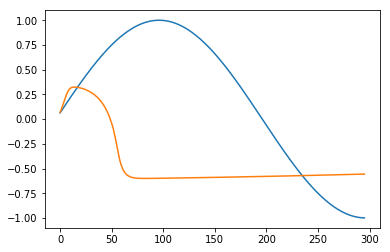

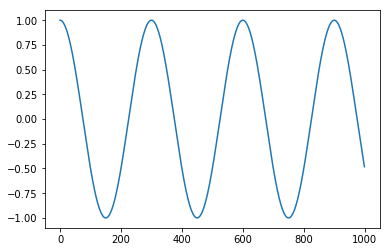

Epoch 1/50
700/700 [==============================] - 0s - loss: 0.2771     
Epoch 2/50
700/700 [==============================] - 0s - loss: 0.0159     
Epoch 3/50
700/700 [==============================] - 0s - loss: 0.0026     
Epoch 4/50
700/700 [==============================] - 0s - loss: 0.0023     
Epoch 5/50
700/700 [==============================] - 0s - loss: 0.0029     
Epoch 6/50
700/700 [==============================] - 0s - loss: 0.0036     
Epoch 7/50
700/700 [==============================] - 0s - loss: 0.0036     
Epoch 8/50
700/700 [==============================] - 0s - loss: 0.0024     
Epoch 9/50
700/700 [==============================] - 0s - loss: 0.0036     
Epoch 10/50
700/700 [==============================] - 0s - loss: 0.0033     
Epoch 11/50
700/700 [==============================] - 0s - loss: 0.0029     
Epoch 12/50
700/700 [==============================] - 0s - loss: 0.0034     
Epoch 13/50
700/700 [==============================] - 0s - loss: 0.0029 

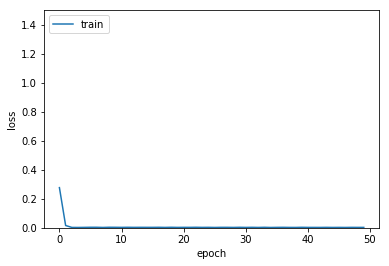

 32/296 [==>...........................] - ETA: 0sloss : 0.00411555181081


In [91]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

def create_dataset(raw, window=4):
    x_dataset, y_dataset = [], []
    for i in range(len(raw)-window):
        x_dataset.append(raw[i:(i+window), 0])
        y_dataset.append(raw[i + window, 0])
    return np.array(x_dataset), np.array(y_dataset)

# 1. 데이터셋 생성하기
cos_data = np.cos(np.arange(1000)*(10*np.pi/1500))[:,None]
x_dataset, y_dataset = create_dataset(cos_data)

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

x_train = x_dataset[:700]
y_train = y_dataset[:700]
x_test = x_dataset[700:]
y_test = y_dataset[700:]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(64, input_shape=(4, 1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=1)

# 5. 학습과정 확인하기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=1)
print('loss : ' + str(loss))

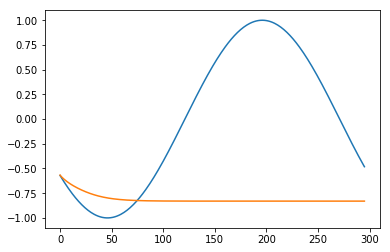

In [100]:
# 7. 모델 사용하기
yhat_test = np.zeros((y_test.shape[0], 1))
xhat_test = [np.vstack([x_test[0][:]])]
    
for i in range(y_test.shape[0]):
    yhat = model.predict([np.array([xhat_test[0]])], batch_size=1)
    yhat_test[i] = yhat
    xhat_test = [np.vstack([xhat_test[-1][1:], yhat])]

plt.plot(y_test)
plt.plot(yhat_test)
plt.show()

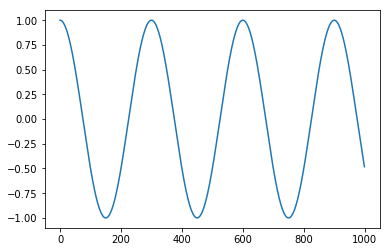

Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0358     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0100     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0104     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0095     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0093     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0092     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0088     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0084     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0083     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0086     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0083     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0078     
Epoch 1/1
700/700 [==============================] - 3s - loss: 0.0081     
Epoch 1/1
70

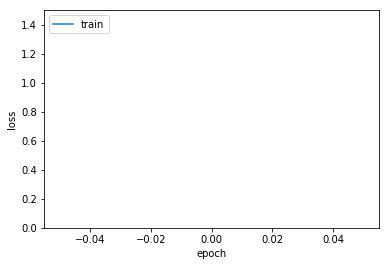

286/296 [===========================>..] - ETA: 0sloss : 0.000850079547253


In [103]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

def create_dataset(raw, window=4):
    x_dataset, y_dataset = [], []
    for i in range(len(raw)-window):
        x_dataset.append(raw[i:(i+window), 0])
        y_dataset.append(raw[i + window, 0])
    return np.array(x_dataset), np.array(y_dataset)

# 1. 데이터셋 생성하기
cos_data = np.cos(np.arange(1000)*(10*np.pi/1500))[:,None]
x_dataset, y_dataset = create_dataset(cos_data)

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

x_train = x_dataset[:700]
y_train = y_dataset[:700]
x_test = x_dataset[700:]
y_test = y_dataset[700:]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(64, batch_input_shape=(1, 4, 1), return_sequences=True, stateful=True))
model.add(Dropout(0.25))
model.add(LSTM(64, stateful=True))
model.add(Dropout(0.25))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
for i in range(50):
    hist = model.fit(x_train, y_train, epochs=1, batch_size=1)
    model.reset_states()

# 5. 학습과정 확인하기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=1)
model.reset_states()
print('loss : ' + str(loss))

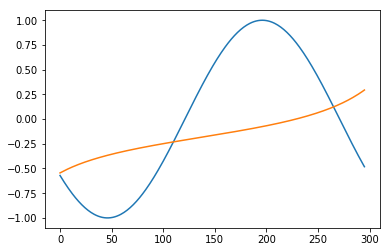

In [105]:
# 7. 모델 사용하기

yhat_test = np.zeros((y_test.shape[0], 1))
xhat_test = [np.vstack([x_test[0][:]])]
    
for i in range(y_test.shape[0]):
    yhat = model.predict([np.array([xhat_test[-1]])], batch_size=1)
    yhat_test[i] = yhat
    xhat_test = [np.vstack([xhat_test[-1][1:], yhat])]

plt.plot(y_test)
plt.plot(yhat_test)
plt.show()

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

In [ ]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [ ]:
# 선형회귀 모델로 수치예측하기

import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기

y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

#### 퍼셉트론 모델

In [ ]:
# 퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 다층퍼셉트론 모델

In [ ]:
# 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 깊은 다층퍼셉트론 모델

In [ ]:
# 깊은 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)